# [E1]1st_project-rock_scissor_paper_classifier

## 데이터 준비하기(이미지 파일 로드 & 리사이징)

### 리사이징을 위한 PIL 라이브러리 로딩

In [1]:
from PIL import Image
import os, glob
import numpy as np
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 각 경로에 접속해 이미지파일을 모두 28*28로 리사이징 진행

In [2]:
import os
# 이미지 파일 로드
image_dir_path = os.getenv("HOME") + "/aiffel/test/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.jpg")  

# 리사이징
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
image_dir_path = os.getenv("HOME") + "/aiffel/test/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("바위 이미지 resize 완료!")

import os
image_dir_path = os.getenv("HOME") + "/aiffel/test/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)
images = glob.glob(image_dir_path + "/*.jpg")

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/test/rock_scissor_paper/scissor
이미지 디렉토리 경로:  /home/aiffel/aiffel/test/rock_scissor_paper/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/test/rock_scissor_paper/paper
보 이미지 resize 완료!


### load_data()함수 정의

* load_data함수를 정의해 이후 JPG파일 데이터셋을 편하게 불러올 수 있습니다.
* load함수에 인자를 받아 다양하게 변할 수 있는 값들에 대응이 가능하도록 함수를 살짝 수정했습니다. 

In [15]:
def load_data(img_path, num, size, col):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=num # 데이터 수 변형을 고려하여 인자값으로 받음
    img_size=size      # 이미지 사이즈가 바뀔것을 고려하여 인자값을 받음
    color=col          # 채널이 바뀔것을 고려하여 인자값을 받음, 흑백 이미지도 가능
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/train"
(x_train, y_train)=load_data(image_dir_path, 3303, 28, 3)


이미지 개수는 3303 입니다.


### 데이터가 함수를 거치면 어떻게 변하는지 알아보기 위해 print()
* 이미 함수 안에서 데이터의 갯수를 설정하고 입력하기 편하게 위치까지 설정해 놨기 때문에 mnist데이터에서 사용했던 reshape()는 사용하지 않아도 됩니다. 
* 일반적으로 학습시 정규화를 진행한다고 하니 정규화가 제대로 되었는지, 그리고 데이터의 생김새를 확인하기 위해 출력해 보겠습니다.

In [4]:
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_train_norm_shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_train_norm_min :", np.min(x_train_norm),",", "x_train_norm_max :", np.max(x_train_norm))

x_train_norm_shape: (3303, 28, 28, 3)
y_train shape: (3303,)
x_train_norm_min : 0.0 , x_train_norm_max : 1.0


### 인덱싱을 활용하여 이미지를 확인

라벨:  0


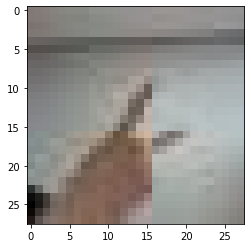

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

* input-shape의 채널이 RGB값 3채널로 바뀌었습니다. 
* 클래스가 10클래스(0~9)에서 3클래스(가위, 바위, 보)로 줄어들었습니다. 
* 하이퍼 파라미터들을 수정하여 성능을 향상시키기 위해 노력하였습니다.
  * mnist에 비해 이미지가 복잡해졌기 때문에 다양한 특징을 추출하기 위해 n_channel_1,2값 상향
  * class 수는 더 적어졌기 떄문에 n_dence값(뉴런의 숫자)은 하향
  * 횟수가 증가하면 과적합의 위험성과 연산 속도가 증가하지만, accuracy가 생각보다 꾸준히 향상되어 20회로 설정


In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=64 # mnist데이터보다 복잡하기 때문에 더 많은 특징을 잡기 위해 상향설정
n_channel_2=64 # 많아지면 속도가 너무 느려지고 성능은 떨어짐
n_dense=16 # 
n_train_epoch=20 # 학습 횟수가 늘어나도 큰 차이가 안보일때까지 실시
 
model=keras.models.Sequential()
# 채널을 몇개로 볼것이냐의 수를 정해주는것
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu')) # 필터의 크기 3*3
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                25616     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 5

## 딥러닝 네트워크 학습시키기
* 위에 설정한 값을 인자로 받아 compile()과 fit()으로 학습

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/20
104/104 [==============================] - 1s 10ms/step - loss: 1.0461 - accuracy: 0.4354
Epoch 2/20
104/104 [==============================] - 1s 11ms/step - loss: 0.7655 - accuracy: 0.6664
Epoch 3/20
104/104 [==============================] - 1s 12ms/step - loss: 0.5633 - accuracy: 0.7735
Epoch 4/20
104/104 [==============================] - 1s 12ms/step - loss: 0.4314 - accuracy: 0.8377
Epoch 5/20
104/104 [==============================] - 1s 8ms/step - loss: 0.3358 - accuracy: 0.8771
Epoch 6/20
104/104 [==============================] - 1s 8ms/step - loss: 0.2556 - accuracy: 0.9140
Epoch 7/20
104/104 [==============================] - 1s 8ms/step - loss: 0.1920 - accuracy: 0.9373
Epoch 8/20
104/104 [==============================] - 1s 8ms/step - loss: 0.1680 - accuracy: 0.9485
Epoch 9/20
104/104 [==============================] - 1s 8ms/step - loss: 0.1256 - accuracy: 0.9622
Epoch 10/20
104/104 [==============================] - 1s 8ms/step - loss: 0.0982 - accuracy: 0.

## 테스트 하기
* 앞서 학습시킨 분류기를 바탕으로 테스트 데이터를 활용하여 분류기를 평가합니다.
* test 데이터를 확인하기 위해 print()를 실행합니다.

In [13]:
image_dir_path = os.getenv("HOME") + "/aiffel/test" # 경로 지정
(x_test, y_test)=load_data(image_dir_path, 300, 28, 3) # 테스트 데이터 불러오기
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))
print(np.min(x_test_norm), np.max(x_test_norm)) # 정규화 여부 확인

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
0.0 1.0


## test결과 확인하기

In [9]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.8816 - accuracy: 0.7133
test_loss: 1.8816033601760864 
test_accuracy: 0.7133333086967468


## 잘못 분류된 데이터 확인

### 오분류 데이터 예측확률분포 및 라벨 확인

In [10]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.00079843 0.7098209  0.2893806 ]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


### 오분류된 이미지 및 예측확률분포 확인, 원인 탐색

예측확률분포: [7.3281649e-07 9.9475420e-01 5.2450914e-03]
라벨: 0, 예측결과: 1


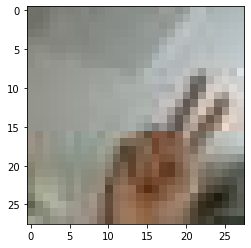

예측확률분포: [4.6291319e-01 3.0938992e-08 5.3708678e-01]
라벨: 0, 예측결과: 2


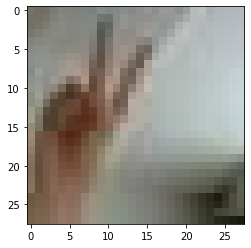

예측확률분포: [9.8421013e-01 1.4581012e-08 1.5789904e-02]
라벨: 2, 예측결과: 0


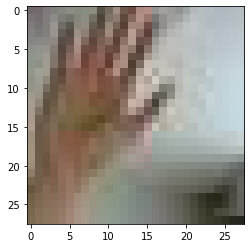

예측확률분포: [7.7361367e-10 1.8221145e-02 9.8177886e-01]
라벨: 1, 예측결과: 2


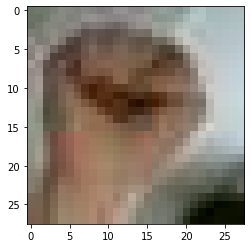

예측확률분포: [1.2478389e-06 8.6103725e-01 1.3896155e-01]
라벨: 0, 예측결과: 1


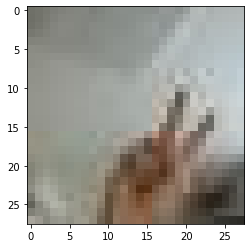

In [12]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 회고..

* 전술한 여러 노력을 제외한 전반적인 과정과 느낀점을 서술하고 싶습니다. 먼저 첫 모델링이었기 때문에 서둘러 해결해야 한다는 생각만 가득해서 아무 생각없이 코드를 붙여넣었습니다. 그러다 accuracy 96%이상이 꾸준히 나와서 마음 놓고 있다가 아무리 생각해도 이상해서 코드를 살펴보다 test셋에 compile을 실행해달라는 오류가 나서 compile(), fit()을 한 것이 원인이었다는 것을 알게 되었습니다. 다시 돌려본 결과 0.3333...


* 이때부터 코드를 뜯어보고 여러가지 잘못된 부분을 수정하였습니다. 그리고 최종 목표인 accuracy를 높이기 위해 여러 방법을 사용하였습니다. 하이퍼 파라미터를 수없이 바꿔본 결과 정확도가 71%가 나오는 수치를 찾을 수 있었습니다.(코드부분과 MarkDown 참고)


* 오분류가 일어난 원인은 다음과 같이 추측하고 있습니다. 
  * 이미지의 화질이 좋지 않아 손가락 등의 가위, 바위, 보를 분류할 수 있는 특징이 모호함
  * 다양한 각도로 촬영하신 이미지가 판단을 어렵게 함(손날로 가위와 보가 구분되지 않음, 너무 가까워서 바위와 보를 착각한 데이터도 있음)
  * 다양한 배경으로 특징 추출이 어려움


* 느낀점
  * '데이터에 대한 이해'를 바탕으로 적재적소에 맞는 분류기와 함수를 사용해야함
  * 모델 구축 시 특징을 많이 추출한다고, 복잡하다고, 학습횟수를 높인다고 정확도가 올라가는게 아님
  * 데이터가 많아질수록 다양한 패턴을 학습해 accuracy가 향상됨
    * 그러나 많기만 해서 좋은것은 아니며 '양질의 데이터'가 전제조건